### Quantitative comparisons

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")
medals = pd.read_csv("medals.csv",index_col=0)
olympics = pd.read_csv("olympics.csv", index_col=0)
climate_change = pd.read_csv("climate_change.csv",parse_dates=["date"], index_col="date")

bar chart를 만들어 보도록 하자.  

C:\Users\wj527\AppData\Local\Temp/ipykernel_26372/884125981.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation= 90)


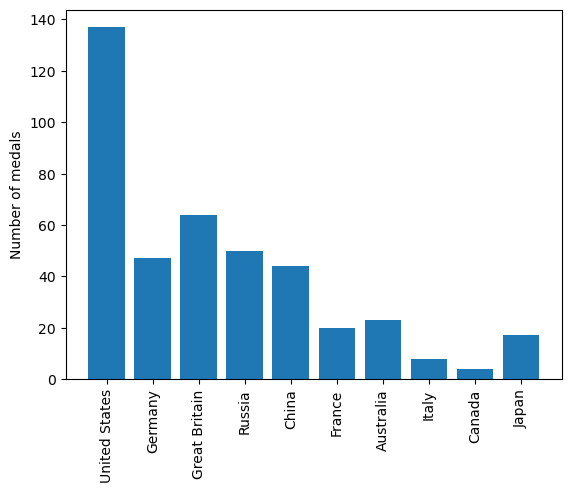

In [89]:
fig ,ax= plt.subplots()

ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation= 90)
ax.set_ylabel("Number of medals")

plt.show()

`bottom`을 설정함으로써 bar chart를 쌓을 수도 있다.  

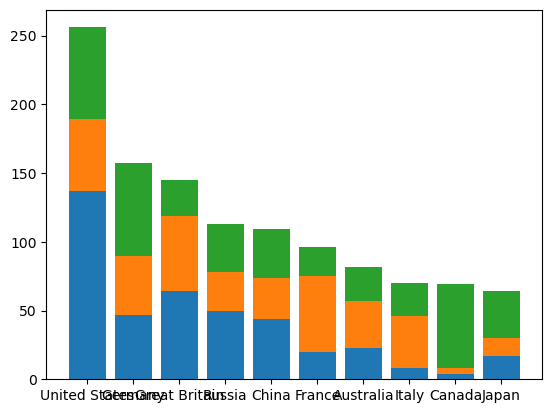

In [90]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"])

ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"])

ax.bar(medals.index, medals["Bronze"],bottom=medals["Gold"]+medals["Silver"])

plt.show()

`label`과 `legend()`를 설정할 수 도 있다.  

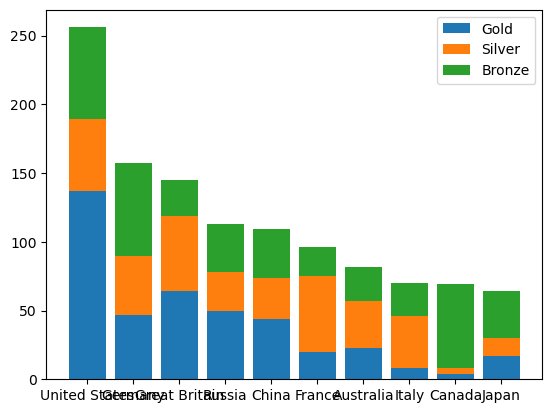

In [91]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], label="Gold")

ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label= "Silver")

ax.bar(medals.index, medals["Bronze"],bottom=medals["Gold"]+medals["Silver"], label="Bronze")

ax.legend()
plt.show()

`mens_rowing`과 `mens_gymnastics`는 각각의 분야에서 2016년 올림픽 메달자에 대한 정보를 제공한다.  

In [92]:

mensrowing = np.logical_and((olympics["Sport"] == "Rowing"),(olympics["Sex"] == 'M'))
mensgymnastics = np.logical_and((olympics["Sport"] == "Gymnastics"),(olympics["Sex"] == 'M'))
mens_rowing = olympics[mensrowing]
mens_gymnastics = olympics[mensgymnastics]

histogram을 그려볼 것이다. histogram은 variable의 전체적인 분포를 제시한다. 

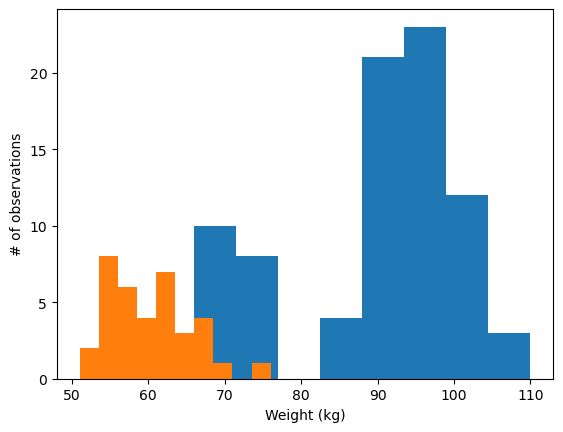

In [93]:
fig, ax = plt.subplots()

ax.hist(mens_rowing["Weight"])
ax.hist(mens_gymnastics["Weight"])

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

plt.show()

두 그래프가 겹쳐져 있는 것을 볼 수 있다. 이럴시 `hisstep`을 설정해주면 된다.  

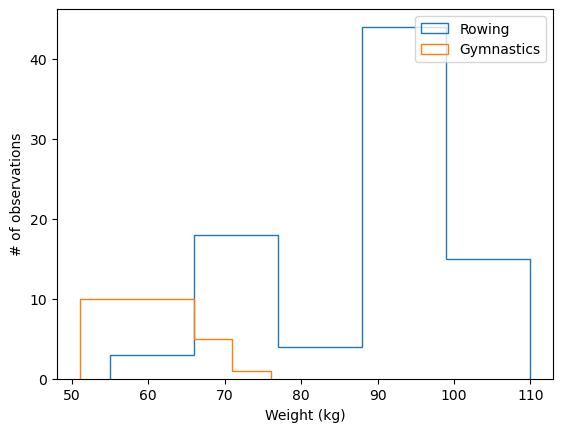

In [94]:
fig, ax = plt.subplots()

ax.hist(mens_rowing["Weight"], bins = 5, label="Rowing", histtype='step')
ax.hist(mens_gymnastics["Weight"], bins = 5, label="Gymnastics", histtype='step')

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

ax.legend()
plt.show()

standard deviation의 error-bar를 추가할 수도 있다. errorbar는 2016년 올림픽 메달 수상자의 키의 평균의 차이를 보여줄 뿐만 아니라, 이들 그룹의 표준 편차도 보여준다. 차이가 variable에 따른 유의미한 관계때문에 나타난지 밝히기 위해서다. 

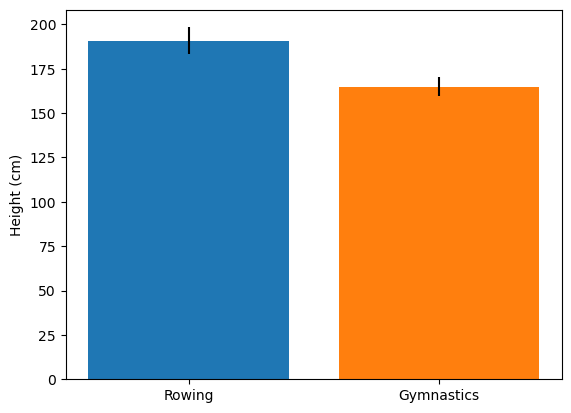

In [95]:
fig, ax = plt.subplots()

ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

ax.set_ylabel("Height (cm)")

plt.show()

IQR은 더 많은 정보를 제공해준다.  

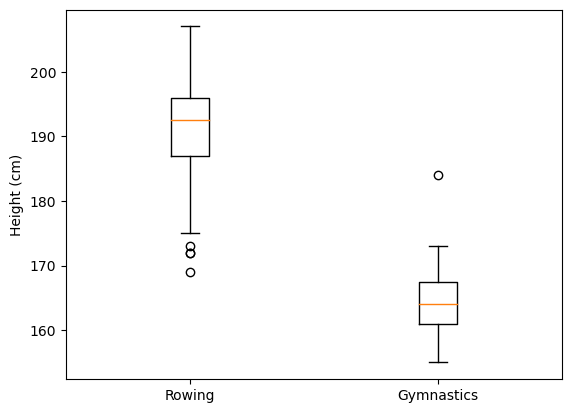

In [96]:
fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"],mens_gymnastics["Height"]])

ax.set_xticklabels(["Rowing","Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

기온과 co2의 관계를 scatter point를 통해 알아보도록 하자.  

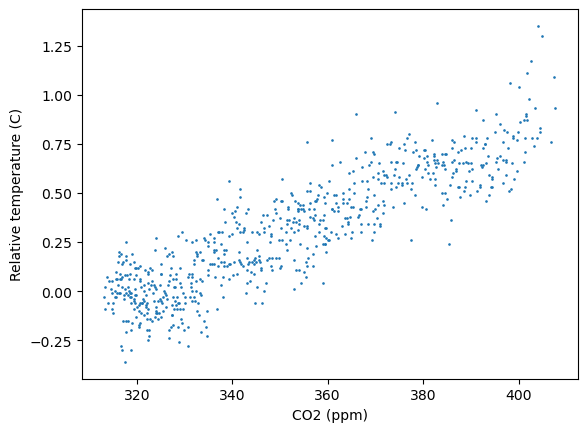

In [97]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"],climate_change["relative_temp"], s=0.8)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

plt.show()

time별로 색을 다르게 할 수도 있다. 초기에는 어두운 색에서 끝에쯤에는 밝은 색으로 encode한 것을 알 수 있다.  

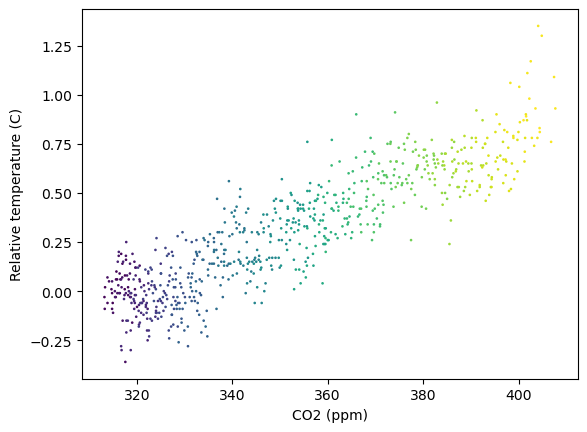

In [98]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"],climate_change["relative_temp"], s=0.8, c= climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

plt.show()

### Sharing visualizations with others

그래프의 스타일을 바꿀 수 있기도 하다. ggplot의 스타일로 바꿔 보자.  
(~~이거 쫌 신기했음ㅋㅋㅋㅋㅋㅋㅋㅋㅋ~~)

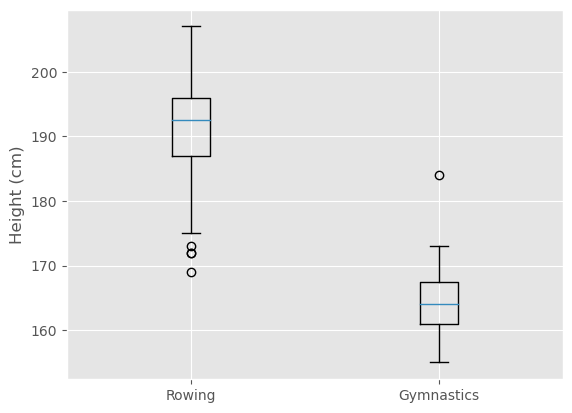

In [99]:
plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"],mens_gymnastics["Height"]])

ax.set_xticklabels(["Rowing","Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

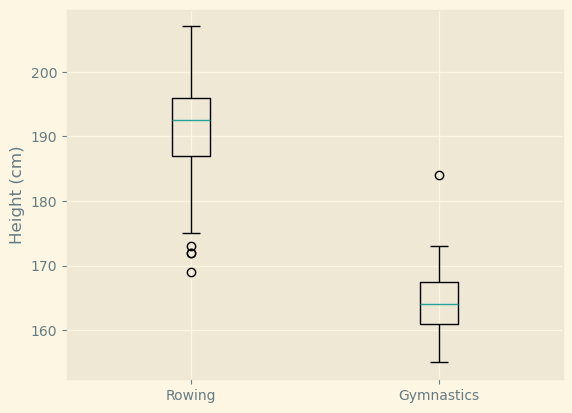

In [100]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"],mens_gymnastics["Height"]])

ax.set_xticklabels(["Rowing","Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

다시 스타일을 지정하지 않는 이상 설정한 스타일이 유지가 된다.  

파일을 저장할 떄에는 `fig`를 건들어 주면 된다.  

In [101]:
fig.savefig("my_figure.png")

해상도(dpi)를 설정할 수도 있다.

In [102]:
fig.savefig("my_figure_300dpi.png",dpi= 300)

`set_size_inches`를 이용하여 사진의 크기를 정할수도 있다. `[3,5]`는 가로가 3인치 세로가 5인치로 정한다는 뜻이다.  

In [103]:
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

Matplotlib의 가장 큰 강점 중 하나는 data를 받았을 때 자동적으로 사용(adapt)될 수 있는 것이다. 예를들어 여러개의 알려져있지 않는 카테고리를 받았을 때, 카테고리 별로 bar plot을 그릴 수 있다.  

In [104]:
sports_column = olympics["Sport"]
sports = olympics["Sport"].unique()
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


이렇게 category를 알 수 있기도 하다.  

C:\Users\wj527\AppData\Local\Temp/ipykernel_26372/3813539483.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


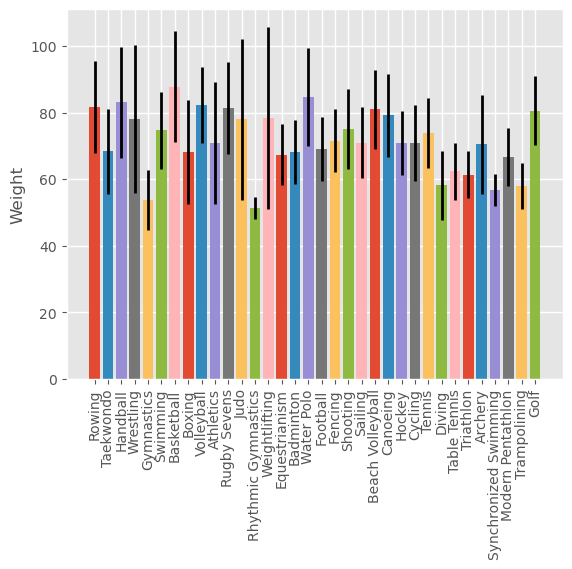

In [105]:
plt.style.use("ggplot")
fig, ax = plt.subplots()

for sport in sports:
  sport_df = olympics[olympics["Sport"]==sport]
  ax.bar(sport,sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())
ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

plt.show()